In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans


In [2]:
# Loading the Walmart Sales Dataset
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")

In [3]:
# Merging Datasets for Unified Analysis
df= train.merge(features, 'left').merge(stores, 'left')

In [4]:
print(df.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  15

In [5]:
print(f'Total number of rows --> {df.shape[0]}')
print(f'Total number of columns --> {df.shape[1]}')

Total number of rows --> 421570
Total number of columns --> 16


In [6]:
# Information about the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [7]:
# Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [8]:
#Number of missing values
df.isna().sum().sort_values(ascending=False).head()

,0
MarkDown2,310322
MarkDown4,286603
MarkDown3,284479
MarkDown1,270889
MarkDown5,270138


In [9]:
#Filling the missing values with 0
df.fillna(0, inplace=True)

In [10]:
# Check unique values in categorical columns
df['Store'].nunique(), df['Dept'].nunique()

(45, 81)

In [11]:
# Display the shape of the merged dataset
df.shape

(421570, 16)

In [12]:
# Check for duplicate rows
df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

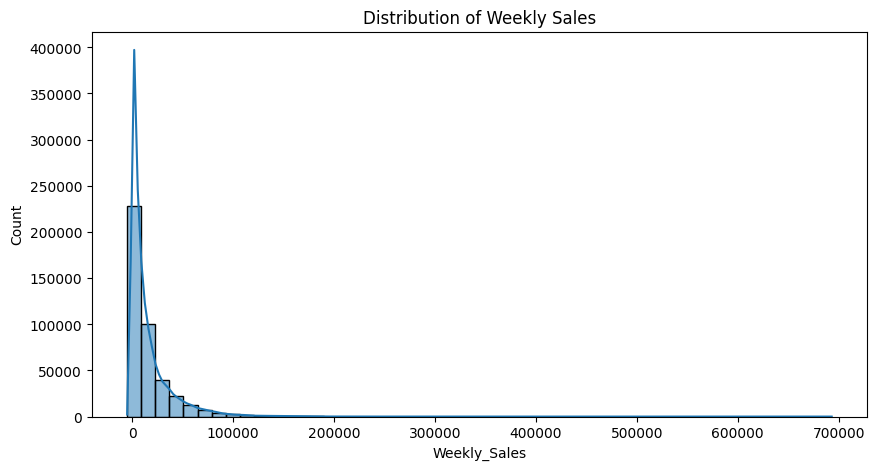

In [13]:
# Distribution of Weekly Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

Interpretation:
This histogram with KDE (Kernel Density Estimation) visualizes the distribution of Weekly_Sales.

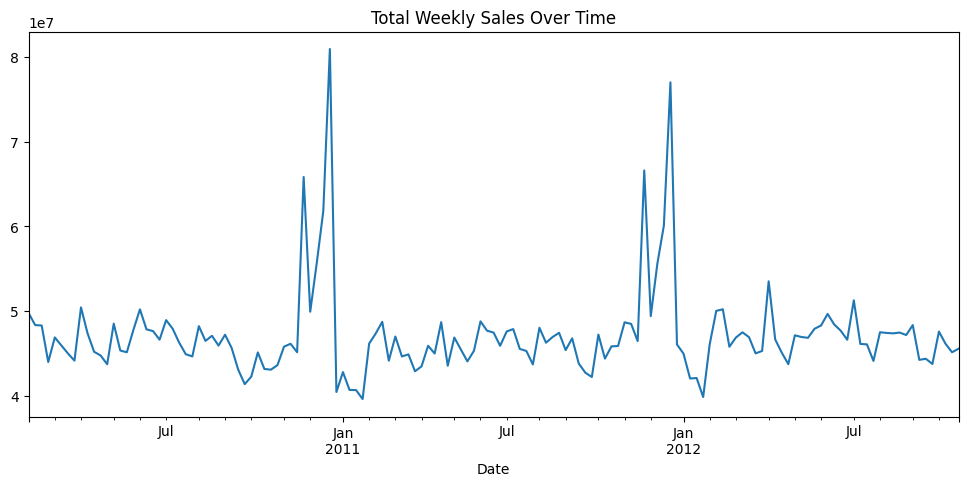

In [14]:
# Total Weekly Sales Over Time
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 5))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.show()

Interpretation:
This time series plot shows how total weekly sales fluctuate over time.

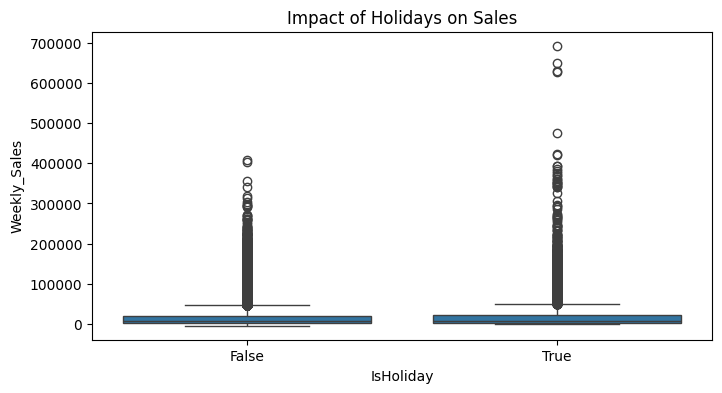

In [15]:
# Impact of Holidays on Sales
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["IsHoliday"], y=df["Weekly_Sales"])
plt.title("Impact of Holidays on Sales")
plt.show()

Interpretation:
This box plot visualizes the distribution of Weekly_Sales for holiday (IsHoliday=1) and non-holiday (IsHoliday=0) weeks.

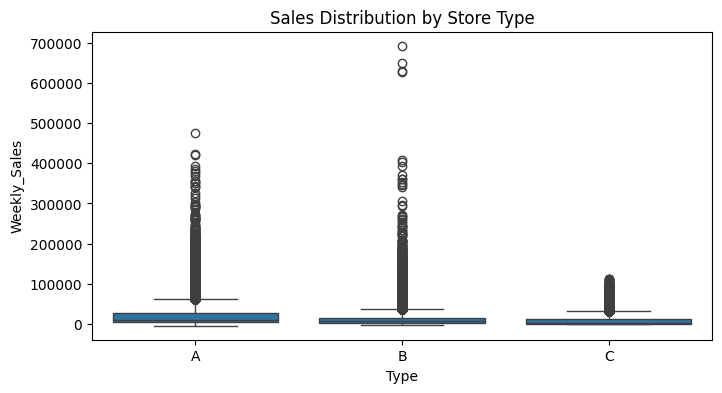

In [16]:
# Sales Distribution by Store Type
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Type"], y=df["Weekly_Sales"])
plt.title("Sales Distribution by Store Type")
plt.show()

Interpretation:
This box plot shows how Weekly_Sales varies across different store types (A, B, and C).

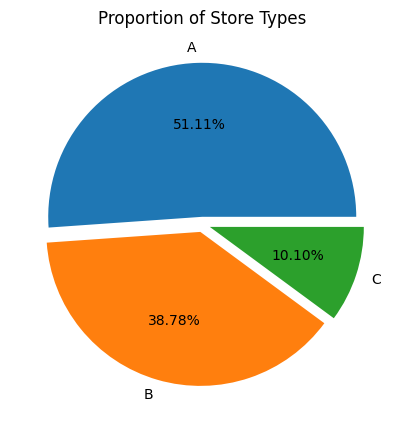

In [17]:
# Proportion of Store Types
store_type_counts = df['Type'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%.2f%%', explode=[0.05]*len(store_type_counts))
plt.title('Proportion of Store Types')
plt.show()

Interpretation:
This pie chart shows the proportion(Store Count)of each store type (A, B, and C) .

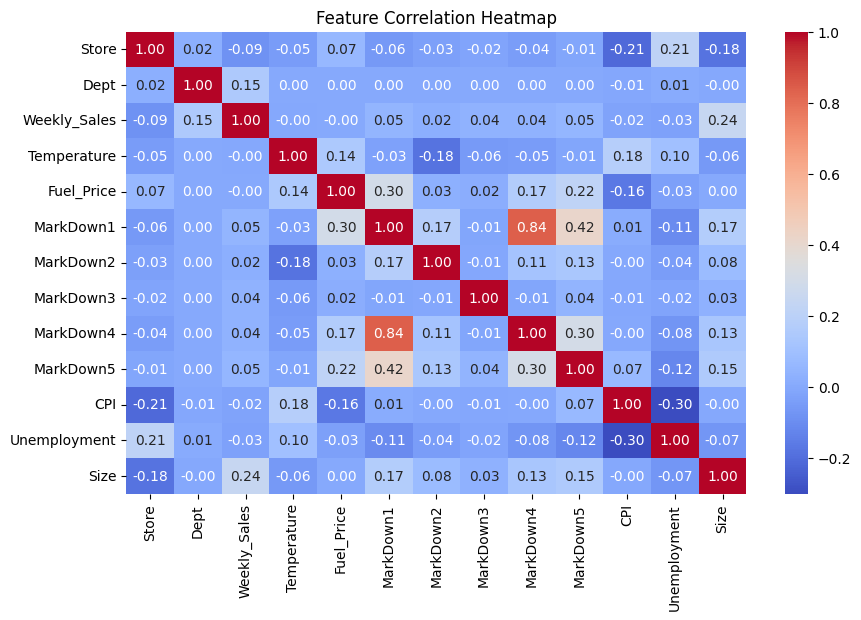

In [18]:
# Feature Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Interpretation:
This heatmap shows the correlation between numerical features in the dataset. Darker red indicates a strong positive correlation, while darker blue indicates a strong negative correlation.

In [19]:
# Train-Test Split
X = df.drop(columns=['Weekly_Sales'])  # Drop target column
y = df['Weekly_Sales']  # Target variable

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Identify categorical columns
categorical_cols = ['Type']  # Add more if needed

# Encode categorical features
encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Weekly Sales Prediction Using Regression Model


In [21]:
# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Random Forest MAE: {mae}")
print(f"Random Forest MSE: {mse}")
print(f"Random Forest R² Score: {r2}")

Random Forest MAE: 1847.8970667682709
Random Forest MSE: 25794093.40245835
Random Forest R² Score: 0.9505358998779345


 Insight: The Random Forest model predicts weekly sales with high accuracy (R² = 95%), and the average error is ~$1,848, making it a reliable model for sales forecasting.

# Sales Trend Classification: Identifying Peak and Low Weeks

In [22]:
# Define threshold dynamically (e.g., median sales)
threshold = np.median(y_train)

# Convert Weekly_Sales to binary labels
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Train XGBoost again
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train_class)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluate
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_class, y_pred_xgb)
report_xgb = classification_report(y_test_class, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}")
print("XGBoost Classification Report:\n", report_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9542
XGBoost ROC-AUC Score: 0.9542
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     42092
           1       0.96      0.95      0.95     42222

    accuracy                           0.95     84314
   macro avg       0.95      0.95      0.95     84314
weighted avg       0.95      0.95      0.95     84314



Insight: The XGBoost classification model accurately identifies peak and low sales weeks with 95.4% accuracy and a high ROC-AUC score of 0.9542, indicating strong performance in distinguishing sales trends

# K-Means Clustering of Stores Based on Sales and Features

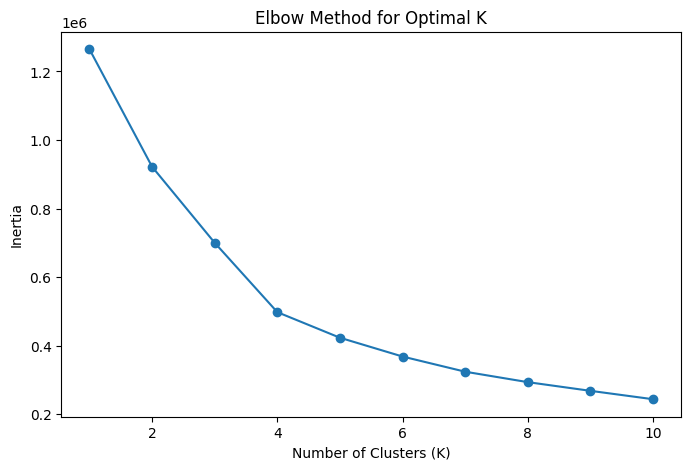

In [23]:
# Select features for clustering (modify as needed)
cluster_features = ['Size', 'Weekly_Sales', 'Temperature']

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cluster_features])

# Find optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


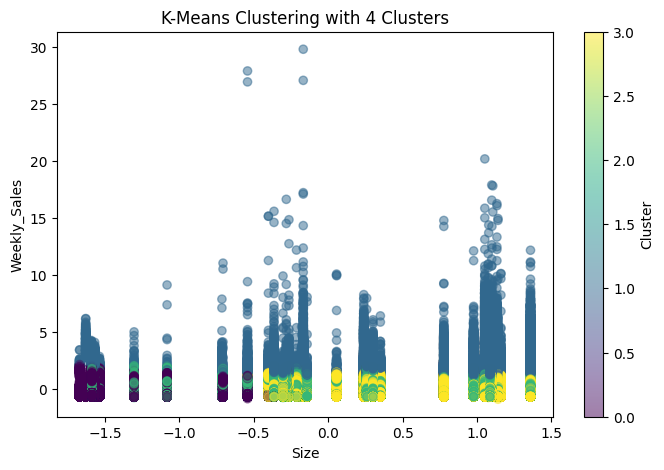

,Size,Weekly_Sales,Temperature
Cluster,,,
0,51403.334791,7290.115024,68.476022
1,175754.105220,72860.085399,60.543415
2,145833.164956,10899.864397,39.363154
3,171189.572458,11865.763923,71.975854


In [24]:
# Set the optimal number of clusters
optimal_K = 4

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters (if using 2D data)
plt.figure(figsize=(8,5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel(cluster_features[0])
plt.ylabel(cluster_features[1])
plt.title(f'K-Means Clustering with {optimal_K} Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Check cluster statistics
df.groupby('Cluster')[cluster_features].mean()


 Insight: The K-Means clustering model groups stores into four distinct clusters based on size, weekly sales, and temperature, revealing patterns in store performance. Cluster 1 represents high-performing stores, while Clusters 0, 2, and 3 capture variations in sales trends and environmental factors.